In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import uniform, norm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [5]:
def train_all(filename_train,filename_val,selector,model_selector,name=""):
    # extract data from files
    x_train, y_train = extract_data(filename_train)
    x_val, y_val = extract_data(filename_val)

    # scale data values
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)

    # feature selection
    feat_sel = VarianceThreshold()
    x_train = feat_sel.fit_transform(x_train)
    x_train = selector.fit_transform(x_train,y_train)
    x_val = selector.transform(feat_sel.transform(x_val))
    
    rand_seed = 3454132

    oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
    x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
#     print(x_smote.shape,y_smote.shape)

    oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
    x_os, y_os = oversampler.fit_resample(x_train,y_train)
#     print(x_os.shape,y_os.shape)
    print("{} Results:".format(name))
    print_res("Vanilla",x_train,y_train,model_selector)
    test_res("Vanilla",x_val,y_val,model_selector)
    print_res("Random Oversampling",x_os,y_os,model_selector)
    test_res("Random Oversampling",x_val,y_val,model_selector)
    print_res("SMOTE",x_smote,y_smote,model_selector)
    test_res("SMOTE",x_val,y_val,model_selector)
    

FromModel DT Results:
Best Score: 0.3262
activation => tanh
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => adaptive
max_iter => 750
momentum => 0.3554610967202623
nesterovs_momentum => False
shuffle => False
solver => lbfgs
Splits: 10
Vanilla Train Accuracy: 99.7506%
Vanilla Validation Accuracy: 28.57%
Vanilla F1-score: 0.22
Best Score: 0.8000
activation => tanh
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => adaptive
max_iter => 750
momentum => 0.3554610967202623
nesterovs_momentum => False
shuffle => False
solver => lbfgs
Splits: 10
Random Oversampling Train Accuracy: 99.8667%
Random Oversampling Validation Accuracy: 28.57%
Random Oversampling F1-score: 0.24
Best Score: 0.7333
activation => tanh
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => adaptive
max_iter => 750
momentum => 0.3554610967202623
nesterovs_momentum => False
shuffle => False
solver => lbfgs
Splits: 10
SMOTE Train Accuracy: 99.8667%
SMOT

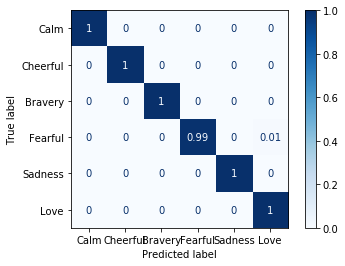

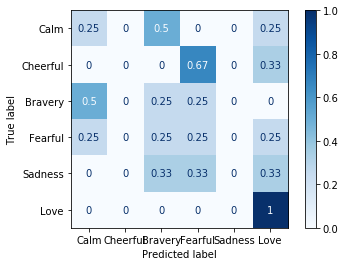

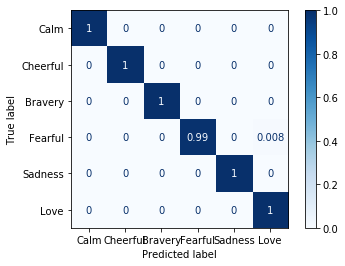

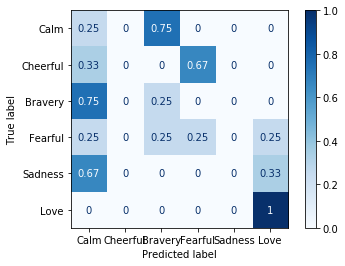

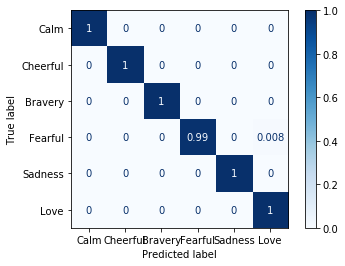

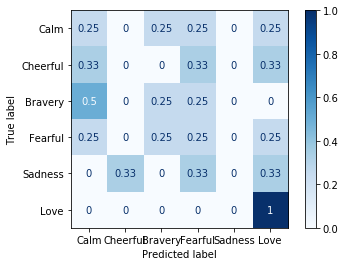

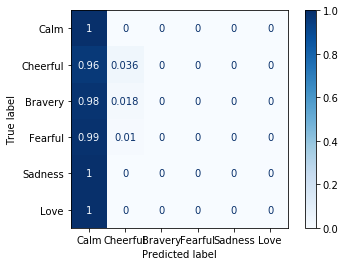

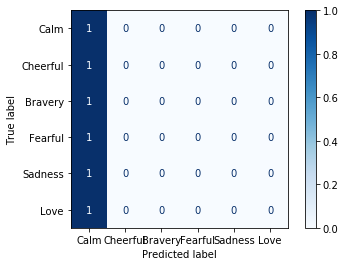

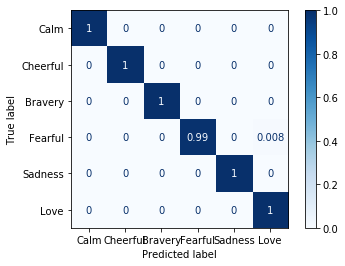

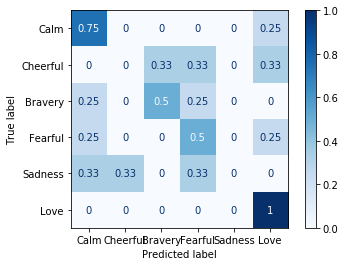

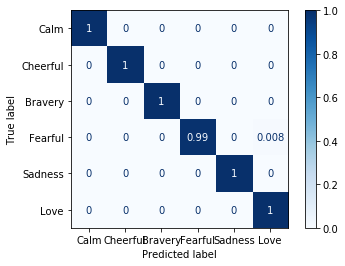

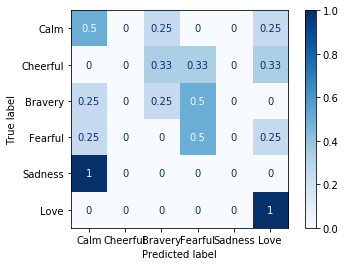

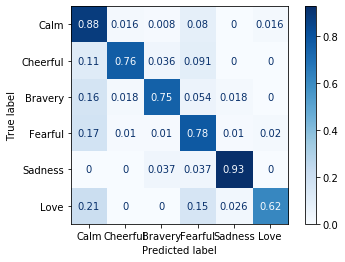

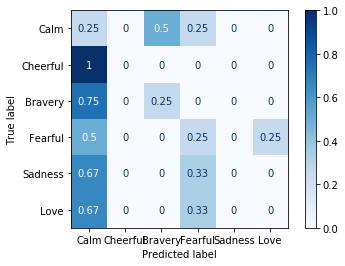

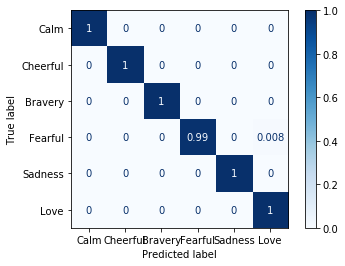

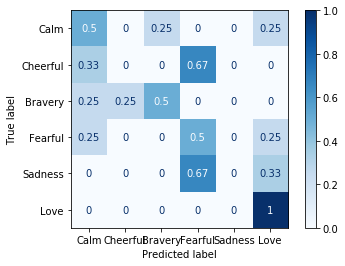

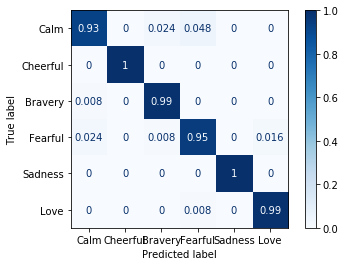

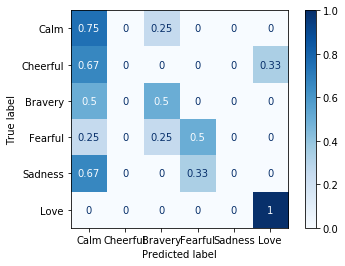

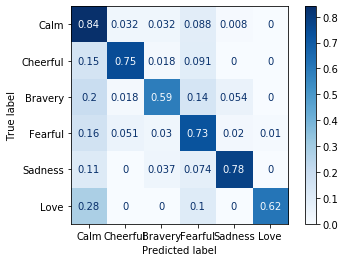

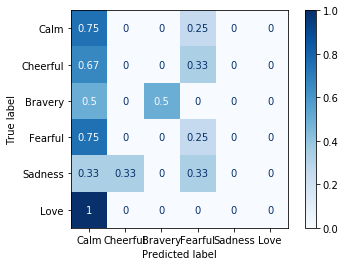

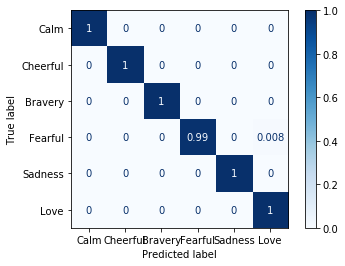

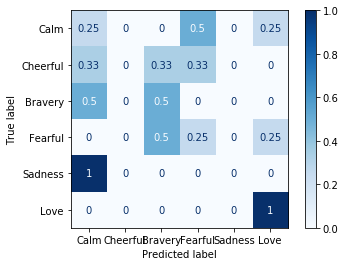

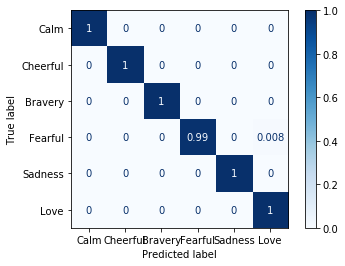

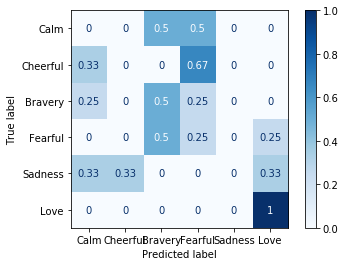

In [4]:
num_features = 45
selectors = {
#     "chi2" : SelectKBest(chi2,k=num_features),
#     "f_classif" : SelectKBest(f_classif,k=num_features),
#     "mutual_info_classif" : SelectKBest(mutual_info_classif,k=num_features),
    "FromModel DT" : SelectFromModel(estimator=tree.DecisionTreeClassifier(random_state=481516234)),
    "RandForest" : SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,random_state=481516234)),
    "LogReg" : SelectFromModel(estimator=LogisticRegression(random_state=481516234)),
    "LinearSVC" : SelectFromModel(estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,random_state=481516234)),
}
# MLPClassifier, RandomizedSearch
random_search_iterations = 80
k_folds = 10
rand_seed = 3249807

parameters = {
    'activation':['logistic', 'tanh', 'relu'], 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [3e-4],
    'batch_size' : [min(200,int(np.power(2,i))) for i in range(4,8)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [750],
    'shuffle' : [True,False],
    'momentum' : uniform(loc=0.2,scale=0.8),
    'nesterovs_momentum' : [True,False],
    'early_stopping' : [True,False]
}
mlp = MLPClassifier(random_state=rand_seed)
random_search_mlp = RandomizedSearchCV(mlp, parameters,cv=k_folds,\
                                       n_iter=random_search_iterations,\
                                       random_state=rand_seed, n_jobs=-1)
for k,v in selectors.items():
    train_all("FinalTrainingSet.csv","Validation Set.csv",v,random_search_mlp,k)


In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
num_features = 45
selectors = {
#     "chi2" : SelectKBest(chi2,k=num_features),
#     "f_classif" : SelectKBest(f_classif,k=num_features),
#     "mutual_info_classif" : SelectKBest(mutual_info_classif,k=num_features),
#     "FromModel DT" : SelectFromModel(estimator=tree.DecisionTreeClassifier(random_state=481516234)),
#     "RandForest" : SelectFromModel(estimator=RandomForestClassifier(n_estimators=100,random_state=481516234)),
#     "LogReg" : SelectFromModel(estimator=LogisticRegression(random_state=481516234)),
    "LinearSVC" : SelectFromModel(estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,random_state=481516234)),
}
# SGDClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 10
rand_seed = 3249807

parameters = {
    'loss' : [ 'hinge', 'log', 'modified_huber', 'squared_hinge', \
              'perceptron', 'squared_loss', 'huber', \
              'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha': [3e-4],
    'l1_ratio': uniform(loc=0,scale=1),
    'fit_intercept' : [True, False],
    'max_iter' : [1000],
    'shuffle' : [True, False],
    'eta0' : uniform(loc=0.01,scale=0.99),
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'early_stopping' : [True, False],
    'warm_start' : [True, False],
    'average' : [True,False]
}
sgdc = SGDClassifier(random_state=rand_seed)
random_search_sgdc = RandomizedSearchCV(sgdc, parameters,cv=k_folds,\
                                        n_iter=random_search_iterations,\
                                        random_state=rand_seed, n_jobs=-1)
for k,v in selectors.items():
    train_all("FinalTrainingSet.csv","Validation Set.csv",v,random_search_sgdc,k)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-6fb6e09dd898>", line 1, in <module>
    from sklearn.linear_model import LogisticRegression, SGDClassifier
  File "C:\Users\Austin\AppData\Roaming\Python\Python37\site-packages\sklearn\__init__.py", line 82, in <module>
    from .base import clone
  File "C:\Users\Austin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py", line 20, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\Austin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\__init__.py", line 27, in <module>
    from .fixes import np_version
  File "C:\Users\Austin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\fixes.py", line 18, in <module>
    import scipy.stats
  File "C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\__init__.py", line 367, in <modu

KeyboardInterrupt: 

LinearSVC Results:
Best Score: 0.3691
learning_rate => 0.16013413659651962
loss => deviance
max_depth => 8
min_samples_leaf => 0.1398365977853838
min_samples_split => 0.10619144049180929
n_estimators => 97
subsample => 0.8772992200610664
warm_start => True
Splits: 10
Vanilla Train Accuracy: 99.5012%
Vanilla Validation Accuracy: 38.10%
Vanilla F1-score: 0.30
Best Score: 0.8053
learning_rate => 0.13859531041777715
loss => deviance
max_depth => 10
min_samples_leaf => 0.050406665470418756
min_samples_split => 0.1538191631906065
n_estimators => 80
subsample => 0.5605068958867606
warm_start => True
Splits: 10
Random Oversampling Train Accuracy: 99.4667%
Random Oversampling Validation Accuracy: 23.81%
Random Oversampling F1-score: 0.19
Best Score: 0.7093
learning_rate => 0.10966217922654668
loss => deviance
max_depth => 5
min_samples_leaf => 0.055738884048238485
min_samples_split => 0.020617877806940466
n_estimators => 95
subsample => 0.5298194078069821
warm_start => False
Splits: 10
SMOTE Tr

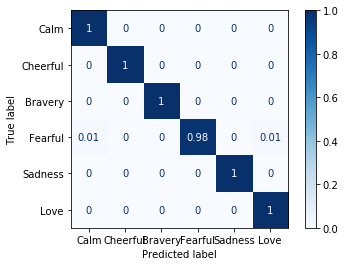

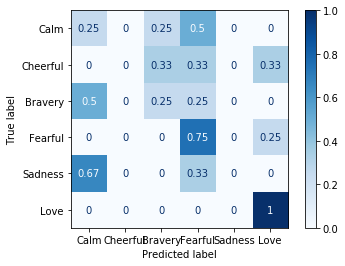

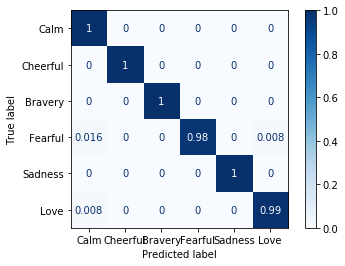

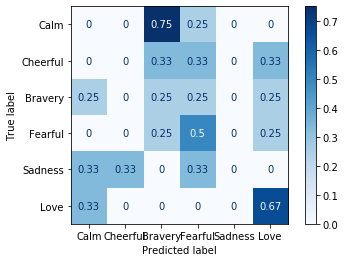

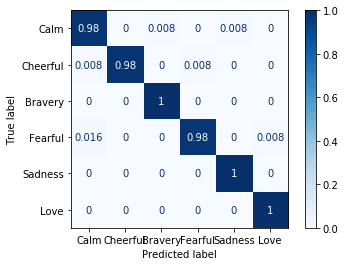

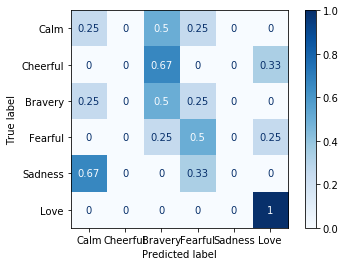

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
num_features = 45
selectors = {
#     "chi2" : SelectKBest(chi2,k=num_features),
#     "f_classif" : SelectKBest(f_classif,k=num_features),
#     "mutual_info_classif" : SelectKBest(mutual_info_classif,k=num_features),
#     "FromModel DT" : SelectFromModel(estimator=tree.DecisionTreeClassifier(random_state=481516234)),
#     "RandForest" : SelectFromModel(estimator=RandomForestClassifier(n_estimators=100,random_state=481516234)),
#     "LogReg" : SelectFromModel(estimator=LogisticRegression(random_state=481516234)),
    "LinearSVC" : SelectFromModel(estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,random_state=481516234)),
}
# GradBoost
random_search_iterations = 500
n_splits = 10
rand_seed = 3249807

parameters = {
    'loss' : ['deviance'],
    'learning_rate' : uniform(loc=0.1,scale=0.1),
    'n_estimators' : [i for i in range(80,111)],
    'subsample' : uniform(loc=0.0,scale=1.0),
    'min_samples_split' : uniform(loc=0.0,scale=1.0),
    'min_samples_leaf' : uniform(loc=0.0001,scale=0.4999),
    'max_depth':range(1, 11), 
    'warm_start' : [True,False]
}

# train classifier for SMOTE data
gradboost = GradientBoostingClassifier(random_state=rand_seed)
random_search_gradboost = RandomizedSearchCV(gradboost, parameters,cv=n_splits, \
                                            random_state=rand_seed, \
                                            n_iter=random_search_iterations,\
                                            n_jobs=-1)
for k,v in selectors.items():
    train_all("FinalTrainingSet.csv","Validation Set.csv",v,random_search_gradboost,k)


chi2 Results:
Best Score: 0.3541
penalty => l2
multi_class => ovr
max_iter => 1000
loss => squared_hinge
fit_intercept => False
dual => True
C => 0.0053669769455404765
Splits: 5
Vanilla Train Accuracy: 37.6559%
Vanilla Validation Accuracy: 19.05%
Vanilla F1-score: 0.10
Best Score: 0.4107
penalty => l2
multi_class => crammer_singer
max_iter => 1000
loss => hinge
fit_intercept => True
dual => False
C => 9.50556592010121
Splits: 5
Random Oversampling Train Accuracy: 48.6667%
Random Oversampling Validation Accuracy: 9.52%
Random Oversampling F1-score: 0.09
Best Score: 0.4227
penalty => l1
multi_class => ovr
max_iter => 1000
loss => squared_hinge
fit_intercept => True
dual => False
C => 9.267593301146864
Splits: 5
SMOTE Train Accuracy: 50.1333%
SMOTE Validation Accuracy: 28.57%
SMOTE F1-score: 0.28
f_classif Results:
Best Score: 0.3615
penalty => l2
multi_class => ovr
max_iter => 1000
loss => squared_hinge
fit_intercept => False
dual => True
C => 0.010375666787451849
Splits: 5
Vanilla Train

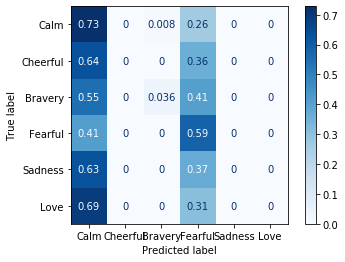

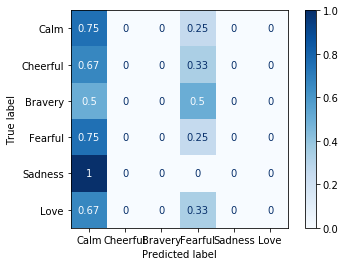

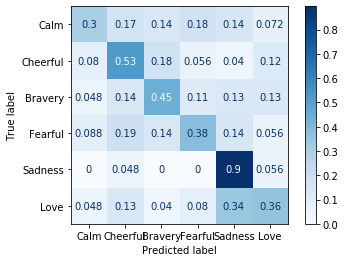

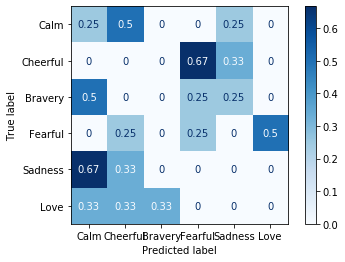

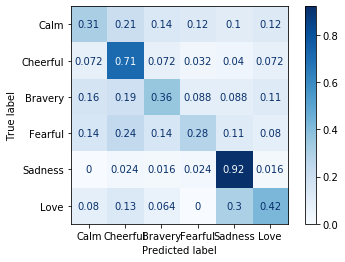

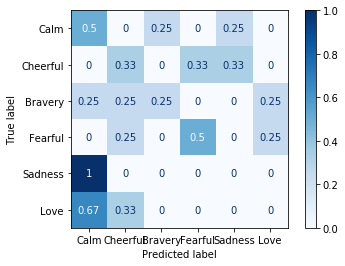

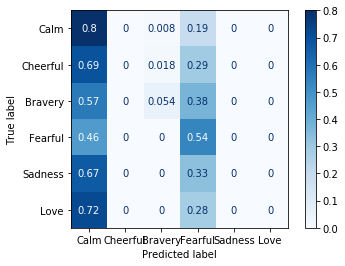

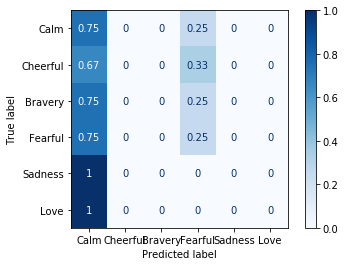

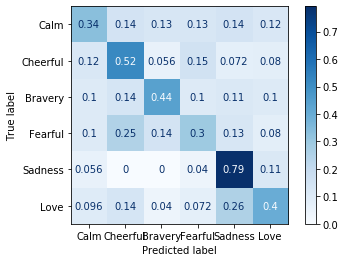

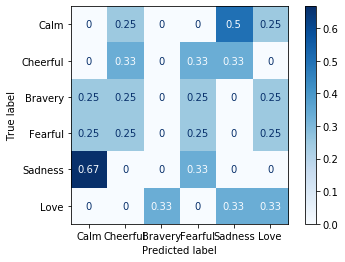

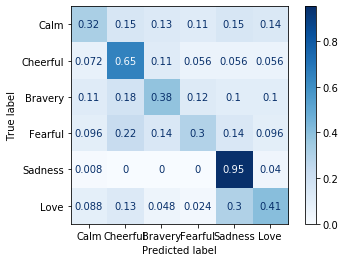

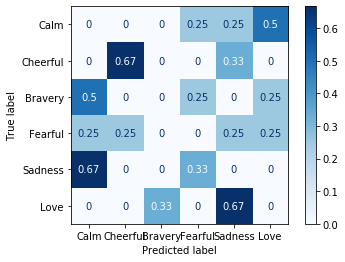

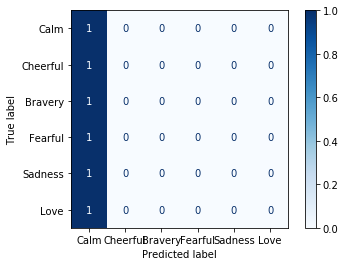

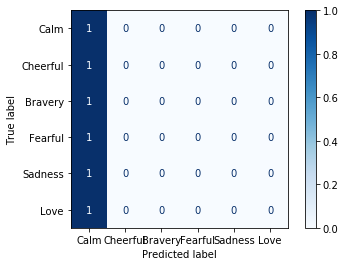

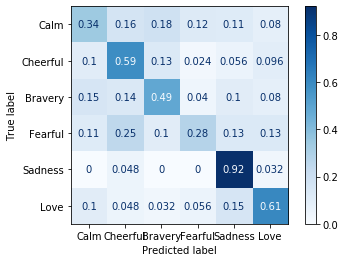

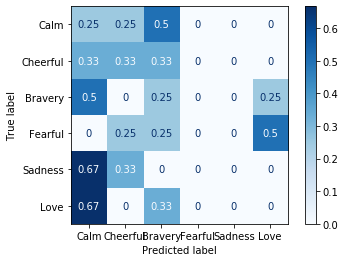

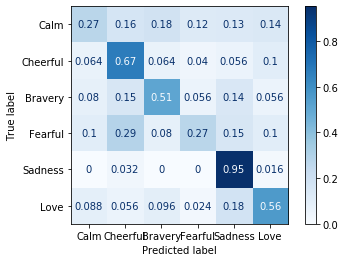

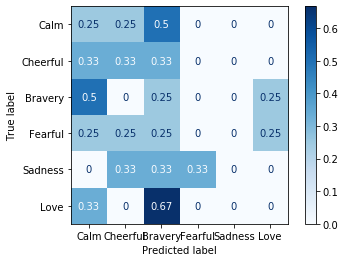

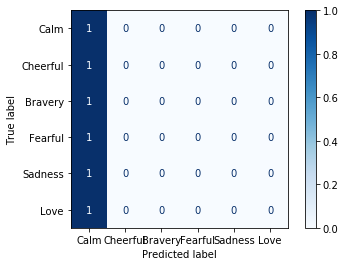

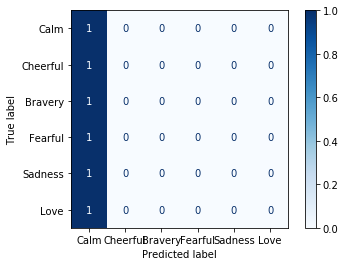

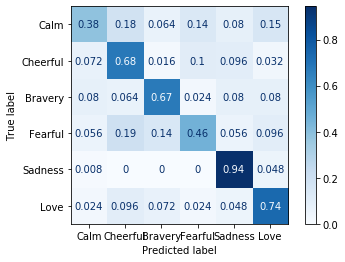

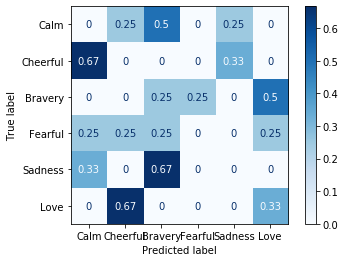

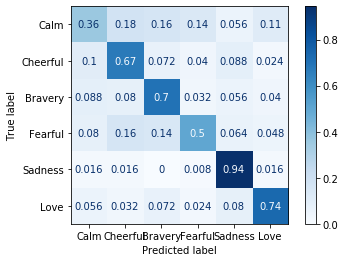

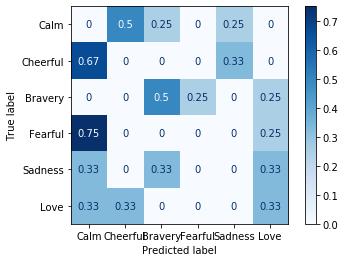

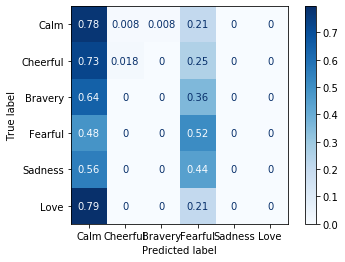

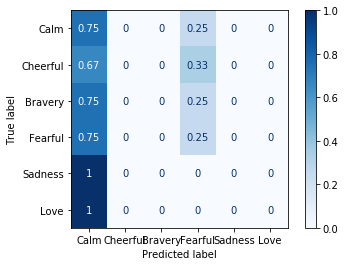

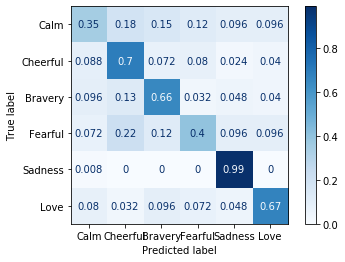

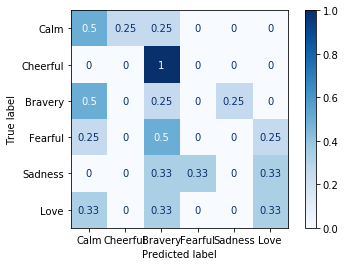

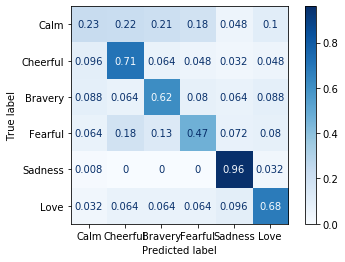

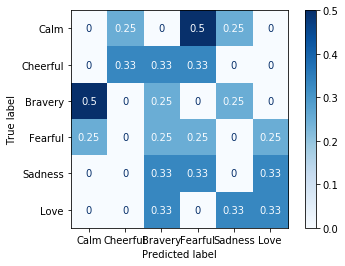

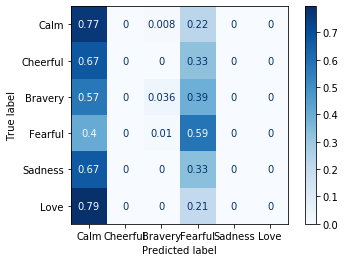

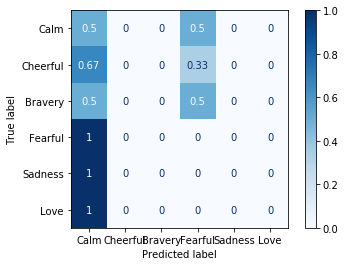

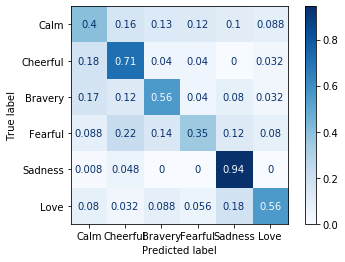

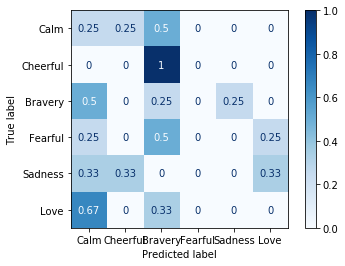

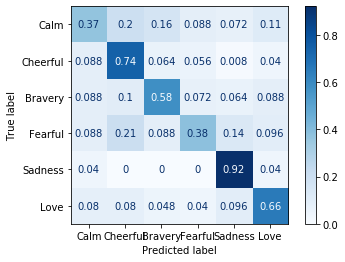

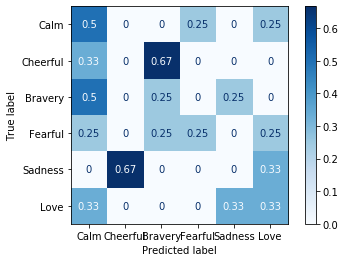

In [7]:
num_features = 45
selectors = {
    "chi2" : SelectKBest(chi2,k=num_features),
    "f_classif" : SelectKBest(f_classif,k=num_features),
    "mutual_info_classif" : SelectKBest(mutual_info_classif,k=num_features),
#     "FromModel DT" : SelectFromModel(estimator=tree.DecisionTreeClassifier(random_state=481516234)),
    "RandForest" : SelectFromModel(estimator=RandomForestClassifier(n_estimators=100,random_state=481516234)),
    "LogReg" : SelectFromModel(estimator=LogisticRegression(random_state=481516234)),
    "LinearSVC" : SelectFromModel(estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,random_state=481516234)),
}
# LinearSVM, Randomized Search
k_folds = 5
random_search_iterations = 500
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-10,1,1000), 
    'multi_class':['ovr', 'crammer_singer'], 
    'fit_intercept' : [True,False],
    'max_iter':[1000]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)
for k,v in selectors.items():
    train_all("FinalTrainingSet.csv","Validation Set.csv",v,random_search_linear,k)


In [ ]:
num_features = 45
selectors = {
    "chi2" : SelectKBest(chi2,k=num_features),
    "f_classif" : SelectKBest(f_classif,k=num_features),
    "mutual_info_classif" : SelectKBest(mutual_info_classif,k=num_features),
    "FromModel DT" : SelectFromModel(estimator=tree.DecisionTreeClassifier(random_state=481516234)),
    "RandForest" : SelectFromModel(estimator=RandomForestClassifier(n_estimators=100,random_state=481516234)),
    "LogReg" : SelectFromModel(estimator=LogisticRegression(random_state=481516234)),
    "LinearSVC" : SelectFromModel(estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,random_state=481516234)),
}
# SVM, Grid Search
k_folds = 5
random_search_iterations = 1000
rand_seed = 3249807

parameters = {
    'C': np.logspace(-10,1,1000), 
    'gamma': ['scale', 'auto'], 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False],
    'max_iter' : [1000],
    'break_ties' : [True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)
for k,v in selectors.items():
    train_all("FinalTrainingSet.csv","Validation Set.csv",v,random_search_svm,k)
